# Top 7 Multiclass Metrics Explained Neatly
## TODO
![](images/pexels.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@deon-black-3867281?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Deon Black</a>
        on 
        <a href='https://www.pexels.com/photo/long-fitness-health-measure-5915361/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

In [33]:
### HIDE

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    cohen_kappa_score,
    confusion_matrix,
    f1_score,
    log_loss,
    matthews_corrcoef,
    plot_confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

labels = ["Ideal", "Premium", "Good", "Fair"]

# Generate dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_redundant=3,
    n_informative=7,
    n_classes=4,
    random_state=1121218,
    weights=[0.2, 0.2, 0.3, 0.3],
)

# Train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1121218
)

# Init logreg
logreg = LogisticRegression()
# Fit
_ = logreg.fit(X_train, y_train)
# Label predict
y_pred = logreg.predict(X_test)
# Predict proba
y_preb_probs = logreg.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)

### Introduction

I have recently published [my most challenging article](https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362?source=your_stories_page-------------------------------------) which was on the topic of multiclass classification (MC). The difficulties I have faced along the way were largely due to the excessive number of classification metrics that I had to learn and explain. By the time I finished, I realized that these metrics deserved an article of their own. 

So, this post will be about the 6 most commonly used MC metrics: precision, recall, F1 score, ROC AUC score, Cohen Kappa score, Matthew's Correlation coefficient and log loss. You will learn how they are calculated, their nuances in Sklearn and how to use them in your own workflow.

### Interpreting an N by N confusion matrix

All of the metrics you will be introduced today are associated with confusion matrices in one way or the other. While a 2 by 2 confusion matrix is intuitive and easy to understand, larger confusion matrices can be *truly confusing*. For this reason, it is a good idea to get some exposure to larger, N by N matrices before diving deep into the metrics that are derived from them. 

Throughout this article, we will use the example of cancer classification. Specifically, the target contains 4 types of diamonds: ideal, premium, good, and fair. Evaluating any type of classifier on this diamonds data will produce a 4 by 4 matrix:

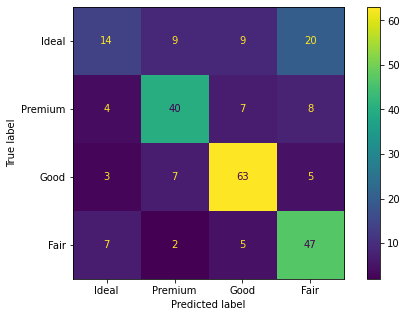

In [34]:
## HIDE
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
cmp.plot(ax=ax);

Even though it gets more difficult to interpret the matrix as the number of classes increases, there are sure-fire ways to find your way around any matrix of any shape. 

The first step is always identifying your positive and negative classes. This depends on the problem you are trying to solve. If the classification is balanced, i. e. you care about each class equally (which is rarely the case), there may not be any positive or negative classes. If this is the case, positive and negative classes are defined per-class basis (more on this later).

However, as a jewelry store owner, you may want your classifier to be better at classifying ideal and premium diamonds better because they are more expensive. In that case, ideal and premium labels will be the positive class and the other labels are collectively considered as negative. 

After identifying the positive and negative classes, define what your true positives, true negatives, false positives, false negatives are. In the above diamonds case:

- **True positives, type 1**: actual ideal, predicted ideal
- **True positives, type 2**: actual premium, predicted premium
- **True negatives**: any negative class labels (good, fair) predicted correctly
- **False positives**: actual value belongs to good or fair class but predicted as either ideal or premium
- **False negative**: actual value belongs to the positive classes but predicted as either good or fair

Once you define them, finding each from the matrix should be easy as it is only the matter of simple sums and subtractions.